In [1]:
"""
Split the dataset using train test split using the default parameter values.
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [2]:
# Load Penguin dataset
penguin_path = r'C:\Users\ibrah\OneDrive\Desktop\COMP472-A1-datasets\penguins.csv'
penguin_data = pd.read_csv(penguin_path)

In [3]:
# Convert features into 1-hot vectors, so data it can be used for training

categorical_columns = ['island', 'sex']
penguin_categorical = penguin_data[categorical_columns]

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
one_hot_encoded = encoder.fit_transform(penguin_categorical).toarray()

# Create a DataFrame with the one-hot encoded features
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded DataFrame with the original DataFrame, dropping the original categorical columns
penguin_data_encoded = pd.concat([penguin_data, one_hot_df], axis=1).drop(categorical_columns, axis=1)

penguin_data = penguin_data_encoded

# Print the modified DataFrame
print("Penguin Dataset after 1-hot encoding:")
penguin_data.head()

Penguin Dataset after 1-hot encoding:


,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,Adelie,39.1,18.7,181,3750,0.0,0.0,1.0,0.0,1.0
1,Adelie,39.5,17.4,186,3800,0.0,0.0,1.0,1.0,0.0
2,Adelie,40.3,18.0,195,3250,0.0,0.0,1.0,1.0,0.0
3,Adelie,36.7,19.3,193,3450,0.0,0.0,1.0,1.0,0.0
4,Adelie,39.3,20.6,190,3650,0.0,0.0,1.0,0.0,1.0


In [4]:
# For Penguin dataset
penguin_features = penguin_data.drop('species', axis=1)  # 'species' is the target variable
penguin_target = penguin_data['species']

penguin_X_train, penguin_X_test, penguin_y_train, penguin_y_test = train_test_split(
    penguin_features, penguin_target, test_size=0.2, random_state=42
)

In [5]:
# Train the Decision Tree
import graphviz


base_dt = DecisionTreeClassifier(random_state=42)
base_dt.fit(penguin_X_train, penguin_y_train)

# Evaluate the Decision Tree
base_dt_predictions = base_dt.predict(penguin_X_test)
base_dt_accuracy = accuracy_score(penguin_y_test, base_dt_predictions)

# Visualize the Base-DT using Graphviz
dot_data = export_graphviz(
    base_dt,
    out_file=None,
    feature_names=penguin_features.columns,
    class_names=penguin_target.unique(),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("penguin_decision_tree", format="png")
graph.view("penguin_decision_tree")

# Visualize the Base-DT here, image of the tree can be found at penguin_decision_tree.png (for simplicity, showing only text representation)
print("Base-DT Accuracy:", base_dt_accuracy)
print("Base-DT Tree:")
print(export_text(base_dt, feature_names=penguin_features.columns))

Base-DT Accuracy: 1.0
Base-DT Tree:
|--- flipper_length_mm <= 206.50
|   |--- culmen_length_mm <= 43.35
|   |   |--- culmen_length_mm <= 42.35
|   |   |   |--- culmen_depth_mm <= 16.70
|   |   |   |   |--- culmen_length_mm <= 39.50
|   |   |   |   |   |--- class: Adelie
|   |   |   |   |--- culmen_length_mm >  39.50
|   |   |   |   |   |--- class: Chinstrap
|   |   |   |--- culmen_depth_mm >  16.70
|   |   |   |   |--- class: Adelie
|   |   |--- culmen_length_mm >  42.35
|   |   |   |--- flipper_length_mm <= 189.50
|   |   |   |   |--- class: Chinstrap
|   |   |   |--- flipper_length_mm >  189.50
|   |   |   |   |--- class: Adelie
|   |--- culmen_length_mm >  43.35
|   |   |--- island_Dream <= 0.50
|   |   |   |--- sex_FEMALE <= 0.50
|   |   |   |   |--- class: Adelie
|   |   |   |--- sex_FEMALE >  0.50
|   |   |   |   |--- class: Gentoo
|   |   |--- island_Dream >  0.50
|   |   |   |--- culmen_length_mm <= 44.65
|   |   |   |   |--- culmen_depth_mm <= 18.90
|   |   |   |   |   |--- cl

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Abalone dataset
abalone_path = r'C:\Users\ibrah\OneDrive\Desktop\COMP472-A1-datasets\abalone.csv'
abalone_data = pd.read_csv(abalone_path)

In [7]:
# For Abalone dataset
abalone_features = abalone_data.drop('Type', axis=1)  # Features excluding the target variable
abalone_target = abalone_data['Type']

# Train-test split
abalone_X_train, abalone_X_test, abalone_y_train, abalone_y_test = train_test_split(
    abalone_features, abalone_target, test_size=0.2, random_state=42
)

In [8]:
# (a) Base-DT: Decision Tree with a specified maximum depth
max_depth_value = 3
base_dt = DecisionTreeClassifier(max_depth=max_depth_value, random_state=42)
base_dt.fit(penguin_X_train, penguin_y_train)
base_dt_predictions = base_dt.predict(penguin_X_test)
base_dt_accuracy = accuracy_score(penguin_y_test, base_dt_predictions)

# Print accuracy
print(f"Base-DT Accuracy: {base_dt_accuracy}")

Base-DT Accuracy: 0.9850746268656716


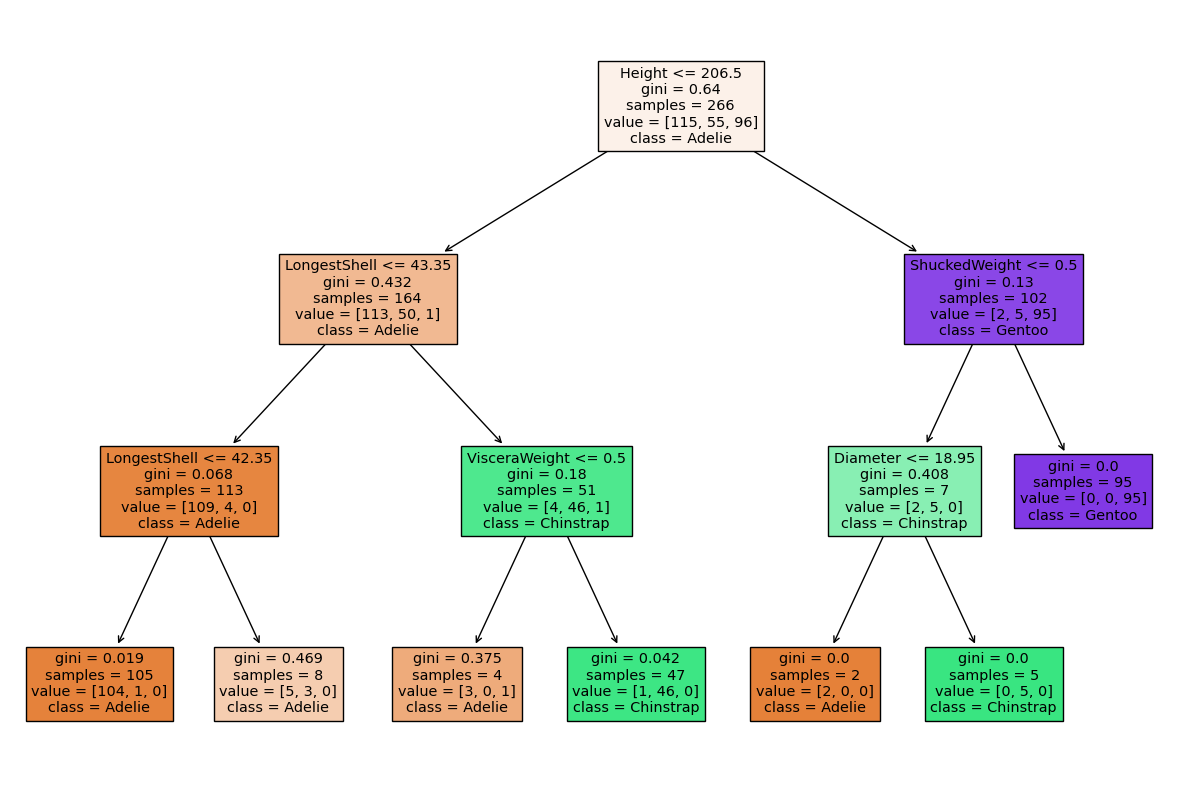

In [9]:
# Decision Tree visualization (limited depth for better visualization)
plt.figure(figsize=(15, 10))
plot_tree(base_dt, filled=True, feature_names=abalone_features.columns, class_names=base_dt.classes_)
plt.show()

In [10]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# (b) Top-DT: Decision Tree with grid search for hyperparameter tuning

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, None],  # You can adjust these values
    'min_samples_split': [2, 5, 10]  # You can adjust these values
}

In [11]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

In [12]:
# Perform grid search on the training data
grid_search.fit(penguin_X_train, penguin_y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [13]:
# Train the Decision Tree with the best hyperparameters on the entire training set
top_dt = DecisionTreeClassifier(**best_params, random_state=42)
top_dt.fit(penguin_X_train, penguin_y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [14]:
# Predictions on the test set
top_dt_predictions = top_dt.predict(penguin_X_test)

# Print accuracy
top_dt_accuracy = accuracy_score(penguin_y_test, top_dt_predictions)
print(f"Top-DT Accuracy: {top_dt_accuracy}")

Top-DT Accuracy: 1.0


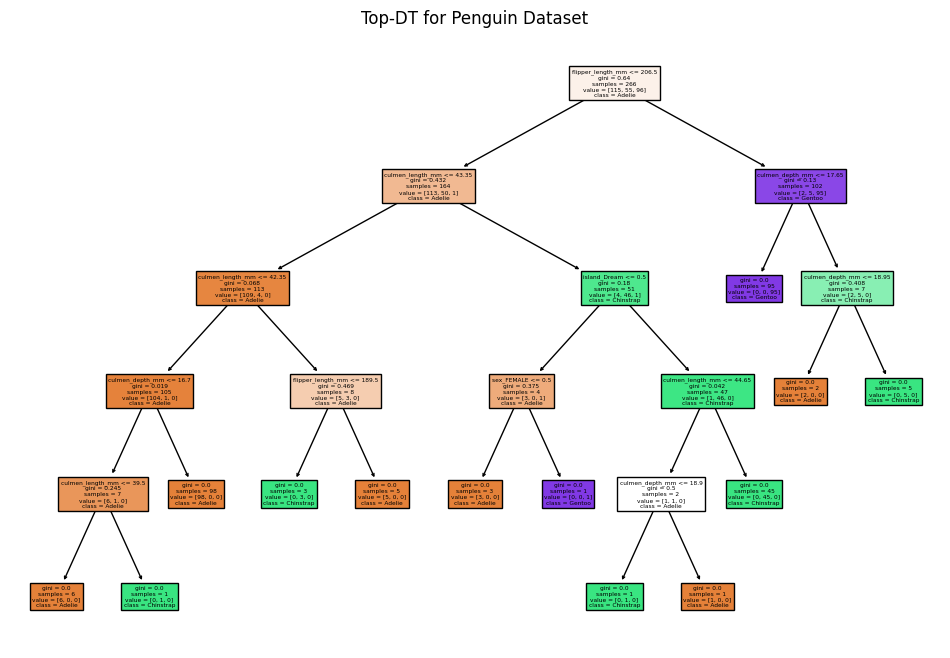

In [15]:
# Import necessary libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# (b) Top-DT: Show the decision tree graphically

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(top_dt, filled=True, feature_names=penguin_features.columns, class_names=top_dt.classes_)
plt.title("Top-DT for Penguin Dataset")
plt.show()


In [16]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# (b) Top-DT: Decision Tree with grid search for hyperparameter tuning

# Define the parameter grid for grid search
param_grid_abalone = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, None],  # You can adjust these values
    'min_samples_split': [2, 5, 10]  # You can adjust these values
}

In [17]:
# Create a Decision Tree classifier
dt_classifier_abalone = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search_abalone = GridSearchCV(dt_classifier_abalone, param_grid_abalone, cv=5, scoring='accuracy')

In [18]:
# Perform grid search on the training data
grid_search_abalone.fit(abalone_X_train, abalone_y_train)

# Get the best hyperparameters from the grid search
best_params_abalone = grid_search_abalone.best_params_
print("Best Hyperparameters for Abalone:", best_params_abalone)

Best Hyperparameters for Abalone: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


In [19]:
# Train the Decision Tree with the best hyperparameters on the entire training set
top_dt_abalone = DecisionTreeClassifier(**best_params_abalone, random_state=42)
top_dt_abalone.fit(abalone_X_train, abalone_y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [20]:
# Predictions on the test set
top_dt_predictions_abalone = top_dt_abalone.predict(abalone_X_test)

# Print accuracy
top_dt_accuracy_abalone = accuracy_score(abalone_y_test, top_dt_predictions_abalone)
print(f"Top-DT Accuracy for Abalone: {top_dt_accuracy_abalone}")

Top-DT Accuracy for Abalone: 0.5466507177033493


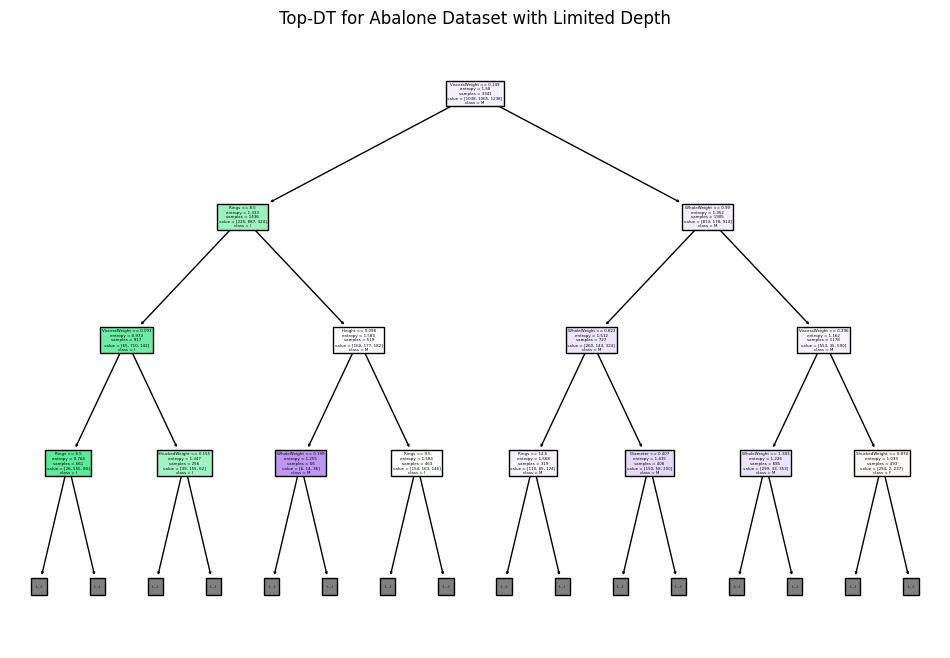

In [21]:
# (b) Top-DT: Show the decision tree graphically for Abalone dataset with limited depth
plt.figure(figsize=(12, 8))
plot_tree(top_dt_abalone, filled=True, feature_names=abalone_features.columns, class_names=top_dt_abalone.classes_, max_depth=3)
plt.title("Top-DT for Abalone Dataset with Limited Depth")
plt.show()


In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# (c) Base-MLP: Multi-Layered Perceptron with default parameters
base_mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd', random_state=42)
base_mlp.fit(penguin_X_train, penguin_y_train)
base_mlp_predictions = base_mlp.predict(penguin_X_test)
base_mlp_accuracy = accuracy_score(penguin_y_test, base_mlp_predictions)

# Display accuracy
print(f"Base-MLP Accuracy: {base_mlp_accuracy}")

Base-MLP Accuracy: 0.4626865671641791


In [23]:
# (c) Base-MLP: Multi-Layered Perceptron with default parameters for Abalone dataset
base_mlp_abalone = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd', random_state=42)
base_mlp_abalone.fit(abalone_X_train, abalone_y_train)
base_mlp_abalone_predictions = base_mlp_abalone.predict(abalone_X_test)
base_mlp_abalone_accuracy = accuracy_score(abalone_y_test, base_mlp_abalone_predictions)

# Display accuracy
print(f"Base-MLP Accuracy for Abalone: {base_mlp_abalone_accuracy}")

Base-MLP Accuracy for Abalone: 0.5107655502392344


c:\Users\ibrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [25]:
# Define parameter grid for Top-MLP
param_grid_mlp_penguin = {
    'activation': ['sigmoid', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd']
}

# Perform grid search
grid_search_mlp_penguin = GridSearchCV(
    MLPClassifier(random_state=42),
    param_grid=param_grid_mlp_penguin,
    scoring='accuracy',
    cv=5
)
grid_search_mlp_penguin.fit(penguin_X_train, penguin_y_train)

c:\Users\ibrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ibrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ibrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['sigmoid', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy')

In [26]:
# Get the best parameters
best_params_mlp_penguin = grid_search_mlp_penguin.best_params_
best_params_mlp_penguin

{'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}

In [27]:
# Train the Top-MLP with the best parameters
top_mlp_penguin = MLPClassifier(random_state=42, **best_params_mlp_penguin)
top_mlp_penguin.fit(penguin_X_train, penguin_y_train)

# Predictions and accuracy
top_mlp_penguin_predictions = top_mlp_penguin.predict(penguin_X_test)
top_mlp_penguin_accuracy = accuracy_score(penguin_y_test, top_mlp_penguin_predictions)
top_mlp_penguin_accuracy

0.6268656716417911

In [28]:
# Define parameter grid for Top-MLP
param_grid_mlp_abalone = {
    'activation': ['sigmoid', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd'],
    'max_iter': [200, 500, 1000]  # Increase max_iter

}

# Perform grid search
grid_search_mlp_abalone = GridSearchCV(
    MLPClassifier(random_state=42),
    param_grid=param_grid_mlp_abalone,
    scoring='accuracy',
    cv=5
)
grid_search_mlp_abalone.fit(abalone_X_train, abalone_y_train)

c:\Users\ibrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ibrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ibrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ibrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['sigmoid', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
                         'max_iter': [200, 500, 1000],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy')

In [29]:
# Get the best parameters
best_params_mlp_abalone = grid_search_mlp_abalone.best_params_
best_params_mlp_abalone

{'activation': 'tanh',
 'hidden_layer_sizes': (30, 50),
 'max_iter': 200,
 'solver': 'adam'}

In [30]:
# Train the Top-MLP with the best parameters
top_mlp_abalone = MLPClassifier(random_state=42, **best_params_mlp_abalone)
top_mlp_abalone.fit(abalone_X_train, abalone_y_train)

# Predictions and accuracy
top_mlp_abalone_predictions = top_mlp_abalone.predict(abalone_X_test)
top_mlp_abalone_accuracy = accuracy_score(abalone_y_test, top_mlp_abalone_predictions)
top_mlp_abalone_accuracy

0.5394736842105263